In [3]:
import cv2
import dlib
import numpy as np
import requests
import json
import base64
import matplotlib.pyplot as plt

# Load the image from file
image_path = '1 (2777).jpg'  # Replace with the path to your image
image = cv2.imread(image_path)

# Initialize dlib's face detector and facial landmarks predictor
detector = dlib.get_frontal_face_detector()
predictor_path = 'shape_predictor_68_face_landmarks.dat'  # Ensure this path is correct
predictor = dlib.shape_predictor(predictor_path)

# Convert image to grayscale for face detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 1)

if len(rects) > 0:
    # Work with the first detected face
    rect = rects[0]
    shape = predictor(gray, rect)
    # Convert landmarks to a NumPy array
    landmarks = np.array([[p.x, p.y] for p in shape.parts()])
else:
    print("No faces detected.")
    exit()

# Create a mask with the same dimensions as the image
mask = np.zeros_like(image)

# Create a convex hull around the face landmarks
hull = cv2.convexHull(landmarks)
# Fill the convex hull on the mask
cv2.fillConvexPoly(mask, hull, (255, 255, 255))

# Encode images to base64 strings
_, buffer = cv2.imencode('.png', image)
init_image_b64 = base64.b64encode(buffer).decode('utf-8')

_, buffer = cv2.imencode('.png', mask)
mask_image_b64 = base64.b64encode(buffer).decode('utf-8')

url = "https://modelslab.com/api/v6/realtime/inpaint"

payload = {
  "key": "nFZoH6cvaDHm3Ns6aCUckBvM7bIs6hZ3l0me5sOIU0X3Wapj6Irv8kH9W0xj",  # Replace with your API key if required
  "prompt": "face without wrinkles and folds on the skin",  # Customize your prompt
  "negative_prompt": "bad quality, blurry",
  "init_image": init_image_b64,
  "mask_image": mask_image_b64,
  "width": str(image.shape[1]),
  "height": str(image.shape[0]),
  "samples": 1,
  "safety_checker": False,
  "strength": 0.7,
  "base64": True,
  "seed": None,
  "webhook": None,
  "track_id": None
}

headers = {
  'Content-Type': 'application/json'
}

response = requests.post(url, headers=headers, data=json.dumps(payload))
response_data = response.json()

if response_data.get('status') == 'success':
    outputs = response_data.get('output', [])
    if outputs:
        output_image_str = outputs[0]
        if output_image_str.startswith('data:image'):
            # Decode base64 image
            header, encoded = output_image_str.split(',', 1)
            output_image_data = base64.b64decode(encoded)
            nparr = np.frombuffer(output_image_data, np.uint8)
            result_image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
        else:
            # Download image from URL
            result_url = outputs[0]
            result_response = requests.get(result_url)
            result_image_data = result_response.content
            nparr = np.frombuffer(result_image_data, np.uint8)
            result_image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
        
        # Display the before and after images
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Before')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.title('After')
        plt.axis('off')

        plt.show()
    else:
        print("No output images received.")
else:
    print("Failed to generate image.")
    print(response_data)


Failed to generate image.
{'status': 'error', 'response': {'message': 'Invalid image url, use static .png link with max resolution upto 2048x2048', 'status': 'error'}, 'message': 'Try again in few seconds', 'error_id': '672b98e8281fb', 'tip': 'Get 20x faster image generation using enterprise plan. Click here : https://modelslab.com/enterprise'}


In [2]:
import cv2
import dlib
import numpy as np
import requests
import json
import base64
import matplotlib.pyplot as plt

# Load the image from file
image_path = '1 (2789).jpg'  # Replace with the path to your image
image = cv2.imread(image_path)

# Initialize dlib's face detector and facial landmarks predictor
detector = dlib.get_frontal_face_detector()
predictor_path = 'shape_predictor_68_face_landmarks.dat'  # Ensure this path is correct
predictor = dlib.shape_predictor(predictor_path)

# Convert image to grayscale for face detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 1)

if len(rects) > 0:
    # Work with the first detected face
    rect = rects[0]
    shape = predictor(gray, rect)
    # Convert landmarks to a NumPy array
    landmarks = np.array([[p.x, p.y] for p in shape.parts()])
else:
    print("No faces detected.")
    exit()

# Create a mask with the same dimensions as the image
mask = np.zeros_like(image)

# Create a convex hull around the face landmarks
hull = cv2.convexHull(landmarks)
# Fill the convex hull on the mask
cv2.fillConvexPoly(mask, hull, (255, 255, 255))

# Encode images to base64 strings
_, buffer = cv2.imencode('.png', image)
init_image_b64 = base64.b64encode(buffer).decode('utf-8')

_, buffer = cv2.imencode('.png', mask)
mask_image_b64 = base64.b64encode(buffer).decode('utf-8')

url = "https://modelslab.com/api/v6/realtime/inpaint"

payload = {
  "key": "nFZoH6cvaDHm3Ns6aCUckBvM7bIs6hZ3l0me5sOIU0X3Wapj6Irv8kH9W0xj",  # Replace with your API key if required
  "prompt": "smoother skin,no wrinkles, realism, no lines on face",  # Customize your prompt
  "negative_prompt": "bad quality, blurry, bad anatomy, big difference, plastik skin",
  "init_image": "data:image/png;base64," + init_image_b64,
  "mask_image": "data:image/png;base64," + mask_image_b64,
  "width": str(image.shape[1]),
  "height": str(image.shape[0]),
  "samples": 1,
  "safety_checker": False,
  "strength": 0.7,
  "base64": True,  # Request output as URL
  "seed": None,
  "webhook": None,
  "track_id": None
}

headers = {
  'Content-Type': 'application/json'
}

response = requests.post(url, headers=headers, data=json.dumps(payload))
response_data = response.json()

# Print the response data for debugging
print(json.dumps(response_data, indent=2))

if response_data.get('status') == 'success':
    outputs = response_data.get('output', [])
    if outputs:
        # Since 'base64' is False, outputs should contain URLs
        result_url = outputs[0]
        # Download image from URL
        result_response = requests.get(result_url)
        result_image_data = result_response.content
        nparr = np.frombuffer(result_image_data, np.uint8)
        result_image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
        
        # Check if the image was loaded successfully
        if result_image is None:
            print("Failed to decode the result image.")
            exit()
        
        # Display the before and after images
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Before')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.title('After')
        plt.axis('off')

        plt.show()
    else:
        print("No output images received.")
else:
    print("Failed to generate image.")
    print(response_data)


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

{
  "status": "success",
  "generationTime": 2.69,
  "id": 118439504,
  "output": [
    "https://pub-3626123a908346a7a8be8d9295f44e26.r2.dev/generations/ab07c8b1-7703-4900-9af9-f0f65c7b52aa-0.base64"
  ],
  "proxy_links": [
    "https://cdn2.stablediffusionapi.com/generations/ab07c8b1-7703-4900-9af9-f0f65c7b52aa-0.base64"
  ],
  "meta": {
    "base64": "yes",
    "enhance_prompt": "no",
    "enhance_style": null,
    "file_prefix": "ab07c8b1-7703-4900-9af9-f0f65c7b52aa",
    "guidance_scale": 1,
    "height": 1024,
    "init_image": "",
    "instant_response": "no",
    "mask_image": "",
    "n_samples": 1,
    "negative_prompt": "bad quality, bad anatomy, blurry, big change, big difference, plastik skin",
    "opacity": 0.7,
    "outdir": "out",
    "padding_down": 10,
    "padding_right": 10,
    "pag_scale": 0.2,
    "prompt": "same anatomy, smoother skin, no wrinkles, no skin folds, realism, no lines on face, smooth face, younger face, same eyes, same mouth",
    "rescale": "yes",

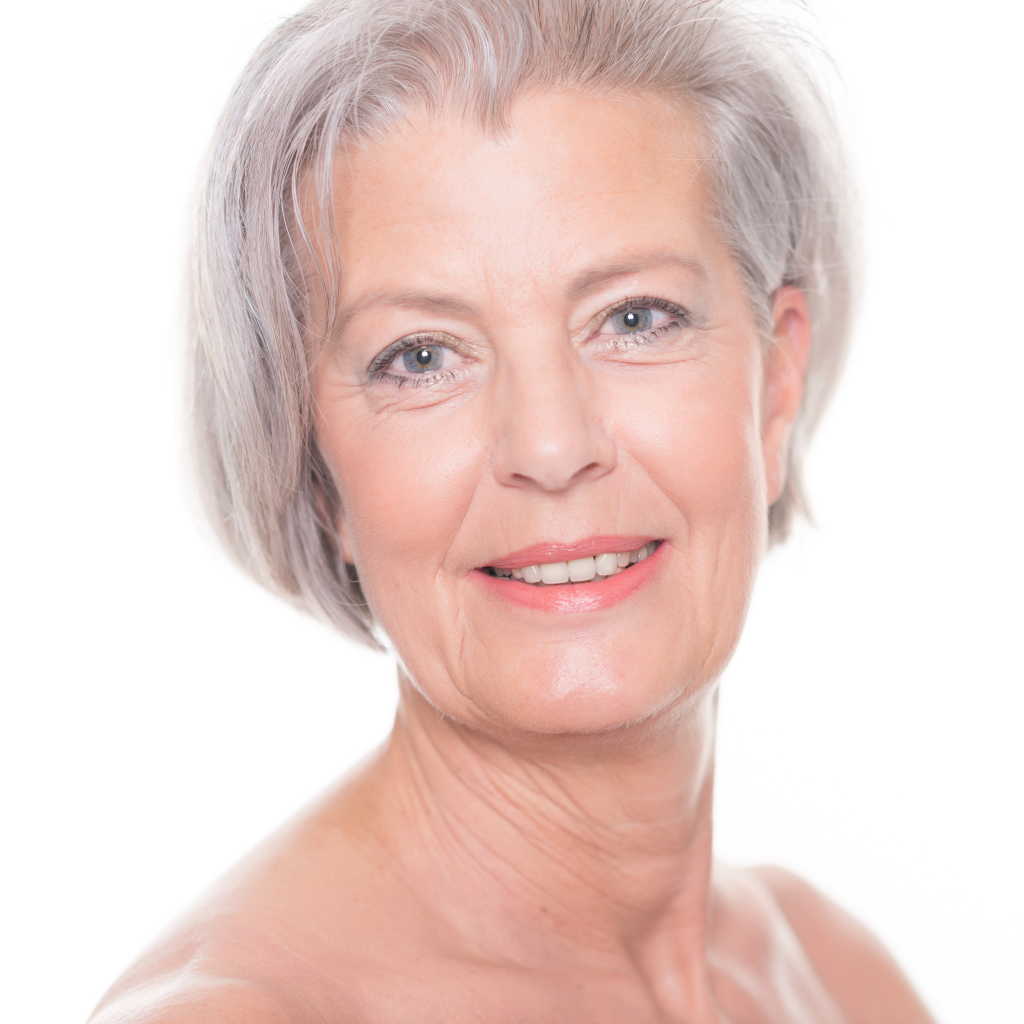
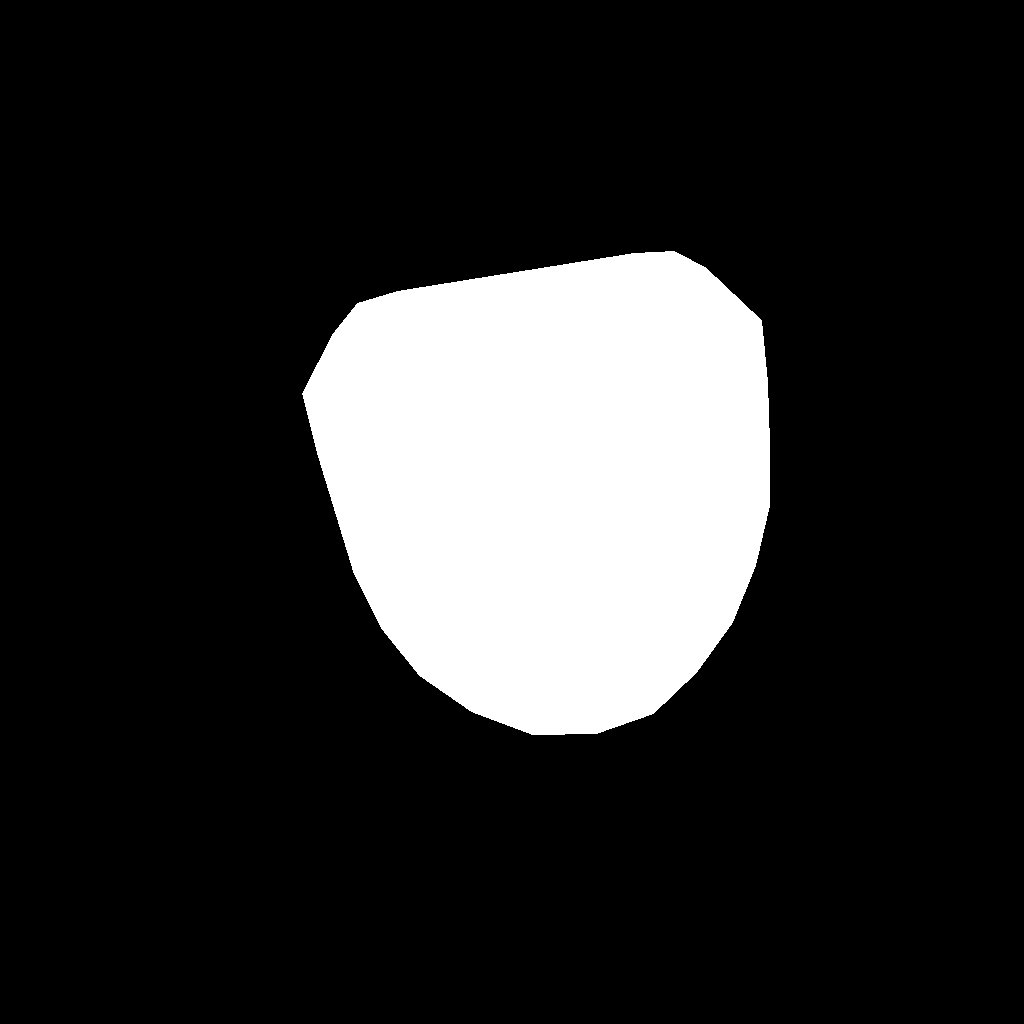

In [6]:
import cv2
import dlib
import numpy as np
import requests
import json
import base64
import matplotlib.pyplot as plt

# Load the image from file
image_path = '1 (2789).jpg'  # Replace with the path to your image
image = cv2.imread(image_path)

# Resize the image to 1024x1024
target_size = (1024, 1024)
image = cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)

# Initialize dlib's face detector and facial landmarks predictor
detector = dlib.get_frontal_face_detector()
predictor_path = 'shape_predictor_68_face_landmarks.dat'  # Ensure this path is correct
predictor = dlib.shape_predictor(predictor_path)

# Convert image to grayscale for face detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 1)

if len(rects) > 0:
    # Work with the first detected face
    rect = rects[0]
    shape = predictor(gray, rect)
    # Convert landmarks to a NumPy array
    landmarks = np.array([[p.x, p.y] for p in shape.parts()])
else:
    print("No faces detected.")
    exit()

# Create a mask with the same dimensions as the resized image
mask = np.zeros_like(image)

# Create a convex hull around the face landmarks
hull = cv2.convexHull(landmarks)
# Fill the convex hull on the mask
cv2.fillConvexPoly(mask, hull, (255, 255, 255))

# Encode images to base64 strings after resizing
_, buffer = cv2.imencode('.png', image)
init_image_b64 = base64.b64encode(buffer).decode('utf-8')

_, buffer = cv2.imencode('.png', mask)
mask_image_b64 = base64.b64encode(buffer).decode('utf-8')
url = "https://modelslab.com/api/v6/realtime/inpaint"

payload = {
  "key": "nFZoH6cvaDHm3Ns6aCUckBvM7bIs6hZ3l0me5sOIU0X3Wapj6Irv8kH9W0xj",  # Replace with your API key
  "prompt": "same anatomy, smoother skin, no wrinkles, no skin folds, realism, no lines on face, smooth face, younger face, same eyes, same mouth",
  "negative_prompt": "bad quality, bad anatomy, blurry, big change, big difference, plastik skin",
  "init_image": "data:image/png;base64," + init_image_b64,
  "mask_image": "data:image/png;base64," + mask_image_b64,
  "width": str(image.shape[1]),
  "height": str(image.shape[0]),
  "samples": 1,
  "safety_checker": False,
  "strength": 0.7,
  "base64": True,
}

headers = {
  'Content-Type': 'application/json'
}

response = requests.post(url, headers=headers, data=json.dumps(payload))

try:
    if response.status_code == 200:
        response_data = response.json()
        
        # Print response for debugging
        print(json.dumps(response_data, indent=2))
        
        if response_data.get('status') == 'success':
            outputs = response_data.get('output', [])
            if outputs:
                # Get the output image URL
                result_url = outputs[0]
                print("Result URL:", result_url)  # Debug: Verify URL
                
                # Download image from URL
                result_response = requests.get(result_url)
                
                if result_response.status_code == 200 and len(result_response.content) > 0:
                    # Decode the image
                    nparr = np.frombuffer(result_response.content, np.uint8)
                    result_image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
                    
                    if result_image is None:
                        print("Failed to decode the result image.")
                    else:
                        # Display the before and after images
                        plt.figure(figsize=(10, 5))

                        plt.subplot(1, 2, 1)
                        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                        plt.title('Before')
                        plt.axis('off')

                        plt.subplot(1, 2, 2)
                        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
                        plt.title('After')
                        plt.axis('off')

                        plt.show()
                else:
                    print(f"Failed to retrieve the image. Status code: {result_response.status_code}")
                    print("Response content is empty or not an image.")
            else:
                print("No output images received.")
        else:
            print("Failed to generate image.")
            print(response_data)
    else:
        print(f"Request failed with status code: {response.status_code}")
        print("Response text:", response.text)

except json.JSONDecodeError:
    print("Failed to decode JSON from response.")
    print("Response text:", response.text)


In [7]:
import cv2
import dlib
import numpy as np
import requests
import json
import base64
import matplotlib.pyplot as plt

# Load the image from file
image_path = '1 (2789).jpg'  # Replace with the path to your image
image = cv2.imread(image_path)

# Resize the image to 1024x1024
target_size = (1024, 1024)
image = cv2.resize(image, target_size, interpolation=cv2.INTER_AREA)

# Initialize dlib's face detector and facial landmarks predictor
detector = dlib.get_frontal_face_detector()
predictor_path = 'shape_predictor_68_face_landmarks.dat'  # Ensure this path is correct
predictor = dlib.shape_predictor(predictor_path)

# Convert image to grayscale for face detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 1)

if len(rects) > 0:
    # Work with the first detected face
    rect = rects[0]
    shape = predictor(gray, rect)
    # Convert landmarks to a NumPy array
    landmarks = np.array([[p.x, p.y] for p in shape.parts()])
else:
    print("No faces detected.")
    exit()

# Create a mask with the same dimensions as the resized image
mask = np.zeros_like(image)

# Create a convex hull around the face landmarks
hull = cv2.convexHull(landmarks)
# Fill the convex hull on the mask
cv2.fillConvexPoly(mask, hull, (255, 255, 255))

# Encode images to base64 strings after resizing
_, buffer = cv2.imencode('.png', image)
init_image_b64 = base64.b64encode(buffer).decode('utf-8')

_, buffer = cv2.imencode('.png', mask)
mask_image_b64 = base64.b64encode(buffer).decode('utf-8')

url = "https://modelslab.com/api/v6/realtime/inpaint"

payload = {
    "key": "nFZoH6cvaDHm3Ns6aCUckBvM7bIs6hZ3l0me5sOIU0X3Wapj6Irv8kH9W0xj",  # Replace with your API key
    "prompt": "same anatomy, smoother skin, no wrinkles, no skin folds, realism, no lines on face, smooth face, younger face, same eyes, same mouth",
    "negative_prompt": "bad quality, bad anatomy, blurry, big change, big difference, plastik skin",
    "init_image": "data:image/png;base64," + init_image_b64,
    "mask_image": "data:image/png;base64," + mask_image_b64,
    "width": str(image.shape[1]),
    "height": str(image.shape[0]),
    "samples": 1,
    "safety_checker": False,
    "strength": 0.7,
    "base64": True,  # Request base64-encoded output
}

headers = {
    'Content-Type': 'application/json'
}

response = requests.post(url, headers=headers, data=json.dumps(payload))

try:
    if response.status_code == 200:
        response_data = response.json()
        
        # Print response for debugging
        print(json.dumps(response_data, indent=2))
        
        if response_data.get('status') == 'success':
            outputs = response_data.get('output', [])
            if outputs:
                # Get the base64-encoded image
                result_base64 = outputs[0]
                
                # Decode the base64 string
                result_image_data = base64.b64decode(result_base64)
                
                # Convert binary data to a NumPy array
                nparr = np.frombuffer(result_image_data, np.uint8)
                
                # Decode the image
                result_image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
                
                if result_image is None:
                    print("Failed to decode the result image.")
                else:
                    # Display the before and after images
                    plt.figure(figsize=(10, 5))

                    plt.subplot(1, 2, 1)
                    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                    plt.title('Before')
                    plt.axis('off')

                    plt.subplot(1, 2, 2)
                    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
                    plt.title('After')
                    plt.axis('off')

                    plt.show()
            else:
                print("No output images received.")
        else:
            print("Failed to generate image.")
            print(response_data)
    else:
        print(f"Request failed with status code: {response.status_code}")
        print("Response text:", response.text)

except json.JSONDecodeError:
    print("Failed to decode JSON from response.")
    print("Response text:", response.text)


{
  "status": "error",
  "response": null,
  "message": "Try again in few seconds",
  "error_id": "672b9efa27645",
  "tip": "Get 20x faster image generation using enterprise plan. Click here : https://modelslab.com/enterprise"
}
Failed to generate image.
{'status': 'error', 'response': None, 'message': 'Try again in few seconds', 'error_id': '672b9efa27645', 'tip': 'Get 20x faster image generation using enterprise plan. Click here : https://modelslab.com/enterprise'}


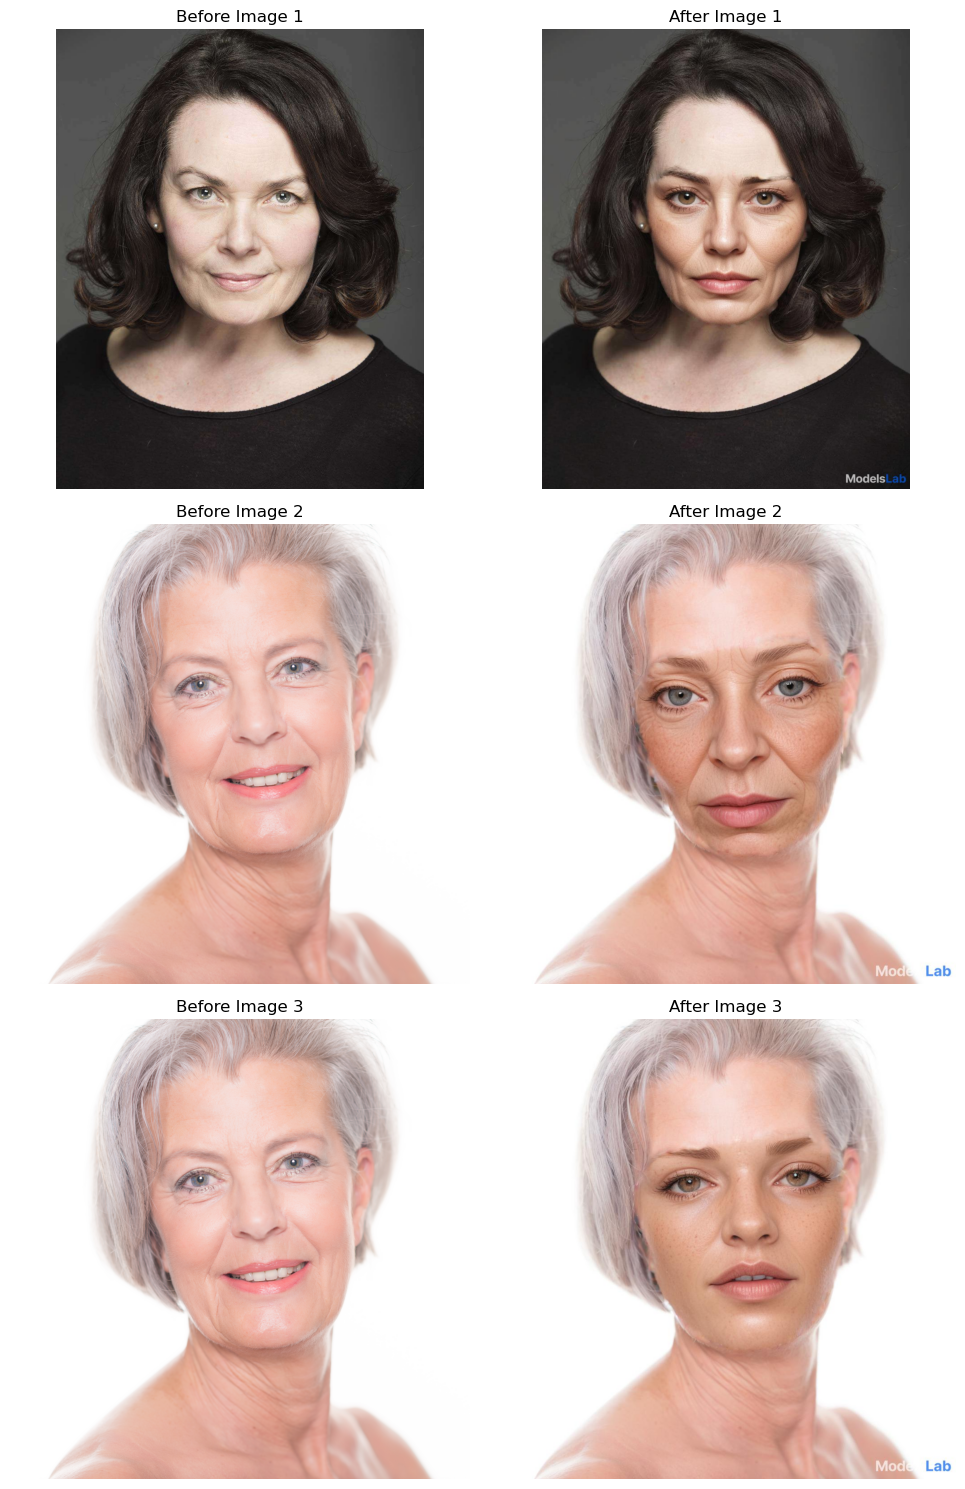

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Function to read and convert an image to RGB
def read_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found: {image_path}")
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Paths to your images
before_images = [
    '1 (2777).jpg',
    '1 (2789).jpg',
    '1 (2789).jpg'
]

after_images = [
    '672b9f08b70cc.png',
    '672b9f017c3ee.png',
    '672b9efc4c64b.png'
]

# Verify that the number of before and after images match
if len(before_images) != len(after_images):
    raise ValueError("The number of 'before' and 'after' images must be the same.")

# Number of image pairs
num_pairs = len(before_images)

# Create a figure with subplots
fig, axes = plt.subplots(num_pairs, 2, figsize=(10, 5 * num_pairs))

# If there's only one pair, axes won't be a list of lists
if num_pairs == 1:
    axes = [axes]

# Loop through each pair of images
for i in range(num_pairs):
    # Read the images
    before_img = read_image(before_images[i])
    after_img = read_image(after_images[i])

    # Display the 'before' image
    axes[i][0].imshow(before_img)
    axes[i][0].set_title(f'Before Image {i + 1}')
    axes[i][0].axis('off')

    # Display the 'after' image
    axes[i][1].imshow(after_img)
    axes[i][1].set_title(f'After Image {i + 1}')
    axes[i][1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()
